**Importing Important Libraries**

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


**Reading data**

In [2]:
df=pd.read_csv("/content/Final_dataset.csv")

In [3]:
df.head()

,DATE,CSUSHPISA,UNRATE,GDP,CPI,Interest,Working Population,Housing subsidies,"Personal,Income",Urban Population,CONS PRICE
0,2001-07-01,113.491,4.6,16591.33333,2.435041,2.528367,1.816143e+08,1.714417,9014.6,225792302.0,143.4
1,2001-08-01,114.167,4.9,16591.33333,3.805443,2.334361,1.818285e+08,1.714417,9001.4,225792302.0,143.3
2,2001-09-01,114.812,5.0,16591.33333,2.782508,2.177768,1.820565e+08,1.714417,8975.3,225792302.0,143.0
3,2001-10-01,115.310,5.3,16594.33333,4.184077,1.986932,1.822366e+08,1.714417,8987.3,225792302.0,142.3
4,2001-11-01,115.857,5.5,16594.33333,3.443171,1.814766,1.824306e+08,1.714417,8985.1,225792302.0,142.1


In [4]:
df.corr()

<ipython-input-4-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,CSUSHPISA,UNRATE,GDP,CPI,Interest,Working Population,Housing subsidies,"Personal,Income",Urban Population,CONS PRICE
CSUSHPISA,1.000000,-0.448224,0.906872,0.671465,-0.275565,0.643850,0.856553,0.866362,0.757459,0.903830
UNRATE,-0.448224,1.000000,-0.413395,-0.522333,-0.315297,-0.055139,-0.131730,-0.211975,-0.135040,-0.227099
GDP,0.906872,-0.413395,1.000000,0.507804,-0.529001,0.860663,0.924202,0.962473,0.932691,0.920811
CPI,0.671465,-0.522333,0.507804,1.000000,0.081205,0.192789,0.421682,0.445750,0.310060,0.599152
Interest,-0.275565,-0.315297,-0.529001,0.081205,1.000000,-0.733441,-0.622161,-0.643469,-0.728637,-0.533003
Working Population,0.643850,-0.055139,0.860663,0.192789,-0.733441,1.000000,0.857097,0.881132,0.961860,0.800011
Housing subsidies,0.856553,-0.131730,0.924202,0.421682,-0.622161,0.857097,1.000000,0.963170,0.936100,0.921498
"Personal,Income",0.866362,-0.211975,0.962473,0.445750,-0.643469,0.881132,0.963170,1.000000,0.967297,0.936634
Urban Population,0.757459,-0.135040,0.932691,0.310060,-0.728637,0.961860,0.936100,0.967297,1.000000,0.881228
CONS PRICE,0.903830,-0.227099,0.920811,0.599152,-0.533003,0.800011,0.921498,0.936634,0.881228,1.000000


<ipython-input-5-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

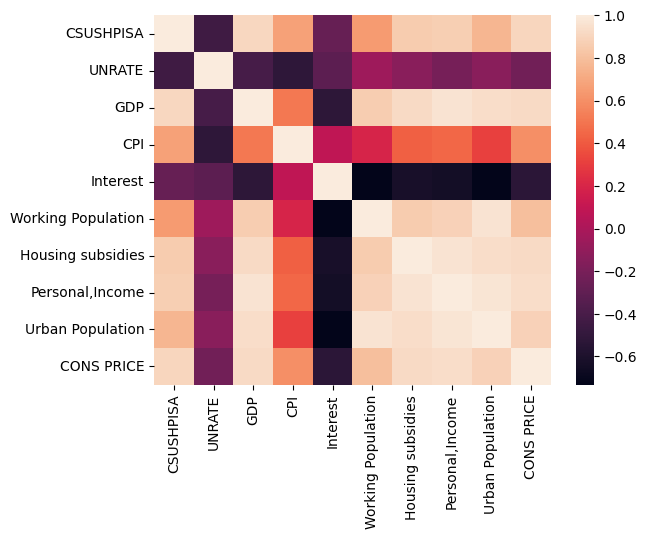

In [5]:
sns.heatmap(df.corr())

In [6]:
y = df.pop("CSUSHPISA")
X = df

Text(0.5, 1.0, 'CASE-SHILLER index vs UNEMPLOYMENT RATE')

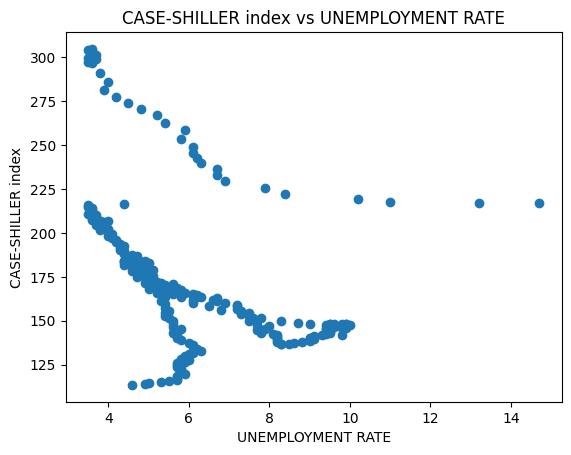

In [7]:
plt.figure()
plt.scatter(x =X['UNRATE'] , y = y)
plt.xlabel("UNEMPLOYMENT RATE")
plt.ylabel("CASE-SHILLER index")
plt.title(f"CASE-SHILLER index vs UNEMPLOYMENT RATE")

**We Can Notice there negative correlation in unemployment rate and home prices. If employment decreases prices will get high**

Text(0.5, 1.0, 'CASE-SHILLER index vs GDP')

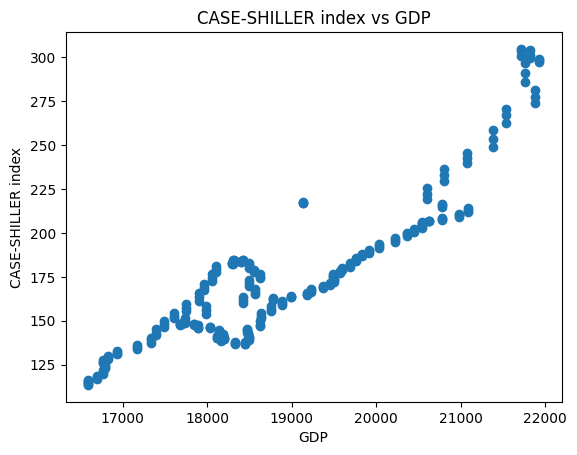

In [8]:
plt.figure()
plt.scatter(x =X['GDP'] , y = y)
plt.xlabel("GDP")
plt.ylabel("CASE-SHILLER index")
plt.title(f"CASE-SHILLER index vs GDP")

**GDP and Home prices have strong positive correlation.
So we can conclude prices will increase with increase in GDP.**

Text(0.5, 1.0, 'CASE-SHILLER index vs CPI')

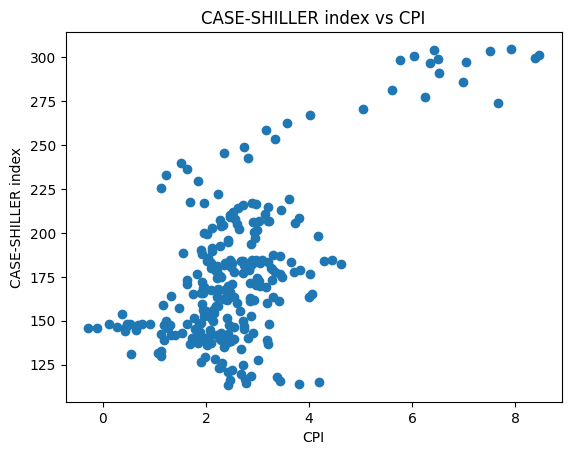

In [9]:
plt.figure()
plt.scatter(x =X['CPI'] , y = y)
plt.xlabel("CPI")
plt.ylabel("CASE-SHILLER index")
plt.title(f"CASE-SHILLER index vs CPI")

**CPI also have positive correlation with home prices **

Text(0.5, 1.0, 'CASE-SHILLER index vs Interest')

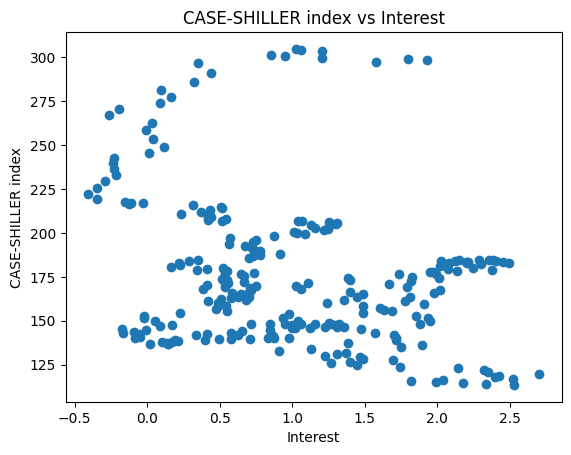

In [10]:
plt.figure()
plt.scatter(x =X['Interest'] , y = y)
plt.xlabel("Interest")
plt.ylabel("CASE-SHILLER index")
plt.title(f"CASE-SHILLER index vs Interest")

Text(0.5, 1.0, 'CASE-SHILLER index vs Working Population')

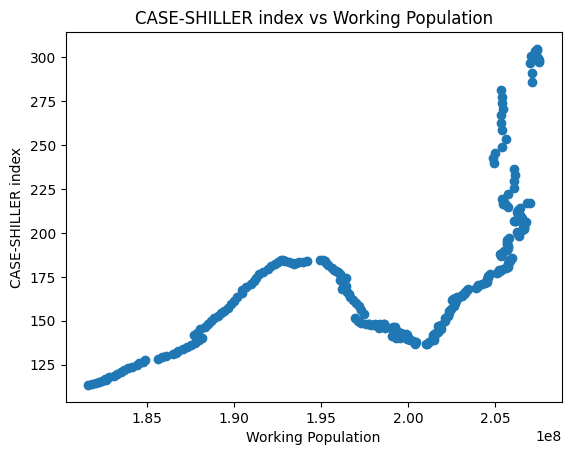

In [11]:
plt.figure()
plt.scatter(x =X['Working Population'] , y = y)
plt.xlabel("Working Population")
plt.ylabel("CASE-SHILLER index")
plt.title(f"CASE-SHILLER index vs Working Population")

**Working population has positive correlation with house prices**

Text(0.5, 1.0, 'CASE-SHILLER index vs Housing subsidies')

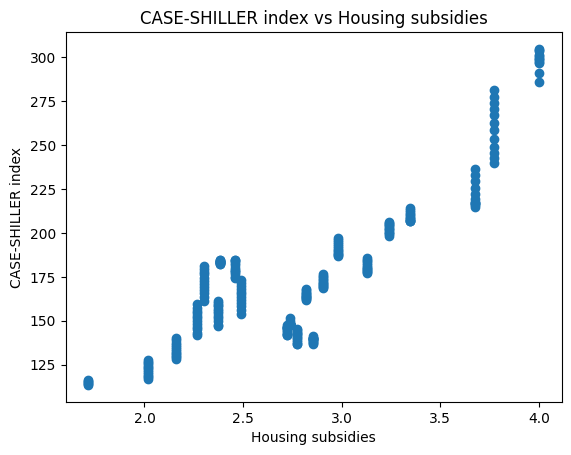

In [12]:
plt.figure()
plt.scatter(x =X['Housing subsidies'] , y = y)
plt.xlabel("Housing subsidies")
plt.ylabel("CASE-SHILLER index")
plt.title(f"CASE-SHILLER index vs Housing subsidies")

**Housing subsidies has positive correlation with house prices**

Text(0.5, 1.0, 'CASE-SHILLER index vs Personal,Income')

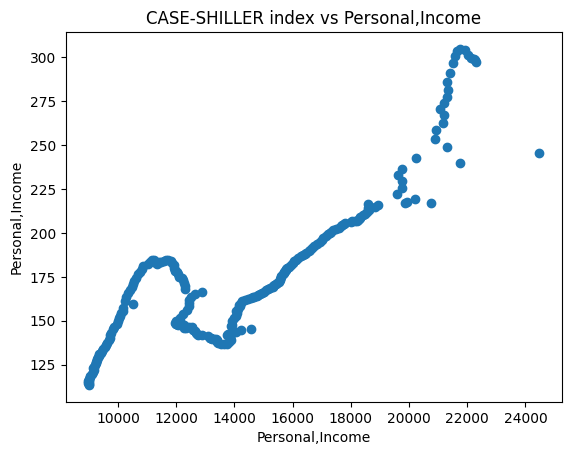

In [13]:
plt.figure()
plt.scatter(x =X['Personal,Income'] , y = y)
plt.xlabel("Personal,Income")
plt.ylabel("Personal,Income")
plt.title(f"CASE-SHILLER index vs Personal,Income")

**Personal income has positive correlation with house prices**

Text(0.5, 1.0, 'CASE-SHILLER index vs Urban Population')

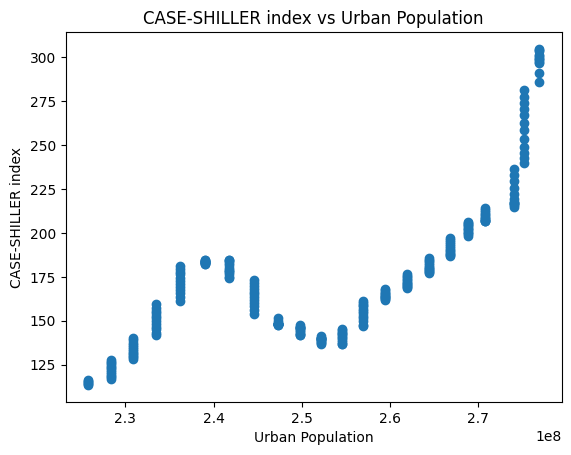

In [14]:
plt.figure()
plt.scatter(x =X['Urban Population'] , y = y)
plt.xlabel("Urban Population")
plt.ylabel("CASE-SHILLER index")
plt.title(f"CASE-SHILLER index vs Urban Population")

**We can notice as urban population increases prices are also increasing**

Text(0.5, 1.0, 'CASE-SHILLER index vs CONS PRICE')

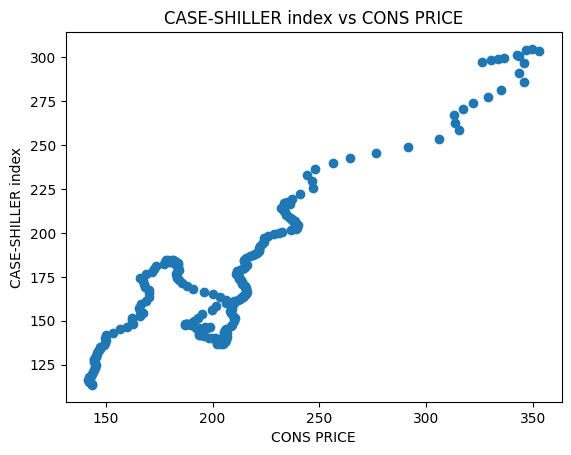

In [15]:
plt.figure()
plt.scatter(x =X['CONS PRICE'] , y = y)
plt.xlabel("CONS PRICE")
plt.ylabel("CASE-SHILLER index")
plt.title(f"CASE-SHILLER index vs CONS PRICE")

**As Construction Price increases we can note that price also increases**

**Data** **Modelling**

In [20]:
df.dtypes

UNRATE                float64
GDP                   float64
CPI                   float64
Interest              float64
Working Population    float64
Housing subsidies     float64
Personal,Income       float64
Urban Population      float64
CONS PRICE            float64
dtype: object

In [19]:
df.set_index("DATE", inplace = True)

In [21]:
scalar = MinMaxScaler()
X = scalar.fit_transform(X)

In [22]:
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size= 0.2, random_state= 42)

In [23]:
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_valid)
score = r2_score(pred, y_valid)
print("The r2_score for the validation set is: ", score)

The r2_score for the validation set is:  0.9559836627195221


In [24]:
coefs = model.coef_
cols = df.columns
for i in range(len(coefs)):
    print(f"The coefficient for {cols[i]} is {coefs[i]}")

The coefficient for UNRATE is 19.82467287329744
The coefficient for GDP is 153.79430849084375
The coefficient for CPI is 1.7614369741059335
The coefficient for Interest is 35.03996060711741
The coefficient for Working Population is -4.766830467944587
The coefficient for Housing subsidies is 44.03678771284899
The coefficient for Personal,Income is 81.31428216909819
The coefficient for Urban Population is -123.94634571662834
The coefficient for CONS PRICE is 54.93448946828572


In [25]:
print("The intercept is: ", model.intercept_)

The intercept is:  91.7785208655833


**Important Factors for house prices can be derived by EDA.
I have done modelling as well**

**key factors that influence US home prices nationally**

1. Unemployment Rate
2. Gdp
3. CPI
4. Worlking Population
5. Housing Subsidies
6. Personal Income
7. Urban Population
8. Construction Price

**Other key factors can be**
1. Immigration Rate.
2. Marriage rate
3. Average House Size
4. Land Availability
5. Tax Rate

**Impact of the great recession is reflected in almost all the plots.**